<a href="https://colab.research.google.com/github/CesarRodriguez19/EstadisticaVerano/blob/main/U_5_Dise%C3%B1os.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diseño en bloques completamente al azar

Se planteó la comparación de cuatro métodos de ensamble, ahora se va a controlar activamente en el experimento a los operadores que realizarán el ensamble, lo que da lugar al siguiente diseño en bloques completos al azar.

| Método | Operador 1 | Operador 2 | Operador 3 | Operador 4 |
|--------|------------|------------|------------|------------|
| A      | 6          | 9          | 7          | 8          |
| B      | 7          | 10         | 11         | 8          |
| C      | 10         | 16         | 11         | 14         |
| D      | 10         | 13         | 11         | 9          |

- Bloque: operador 1, operador 2, operador 3 y operador 4.
- Variable de interés: método A, método B, método C, método D.
- Variable de comparación (respuesta): tiempo en minutos.


In [33]:
import pandas as pd
from io import StringIO

data = '''
metodo,operador,valor
A,1,6
A,2,9
A,3,7
A,4,8
B,1,7
B,2,10
B,3,11
B,4,8
C,1,10
C,2,16
C,3,11
C,4,14
D,1,10
D,2,13
D,3,11
D,4,9
'''

df = pd.read_csv(StringIO(data))
df

,metodo,operador,valor
0,A,1,6
1,A,2,9
2,A,3,7
3,A,4,8
4,B,1,7
5,B,2,10
6,B,3,11
7,B,4,8
8,C,1,10
9,C,2,16


In [34]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'valor ~ C(metodo) + C(operador)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova

,sum_sq,df,F,PR(>F)
Intercept,75.571429,1.0,37.785714,0.000169
C(metodo),61.500000,3.0,10.250000,0.002919
C(operador),28.500000,3.0,4.750000,0.029846
Residual,18.000000,9.0,NaN,NaN


valor-p (Shapiro) = 0.8844458946687104


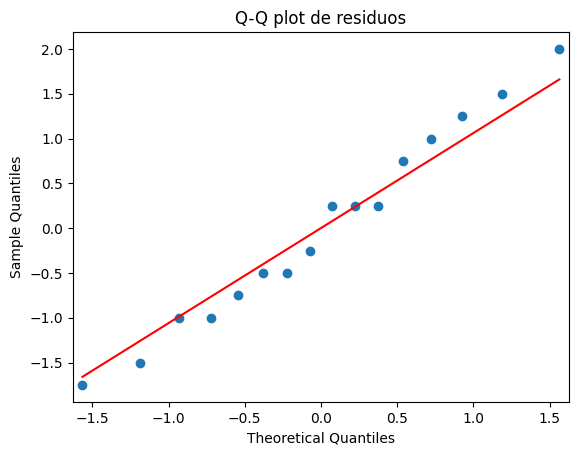

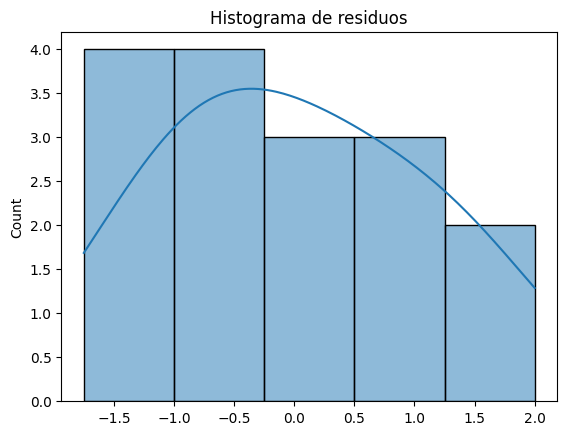

In [35]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [36]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['valor']
grupo2 = df[df['metodo'] == 'B']['valor']
grupo3 = df[df['metodo'] == 'C']['valor']
grupo4 = df[df['metodo'] == 'D']['valor']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.189038042393917


Multiple Comparison of Means - Tukey HSD, FWER=0.50
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B      1.5  0.709 -0.5048 3.5048  False
     A      C     5.25 0.0123  3.2452 7.2548   True
     A      D     3.25 0.1443  1.2452 5.2548   True
     B      C     3.75 0.0799  1.7452 5.7548   True
     B      D     1.75 0.6049 -0.2548 3.7548  False
     C      D     -2.0 0.5019 -4.0048 0.0048  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

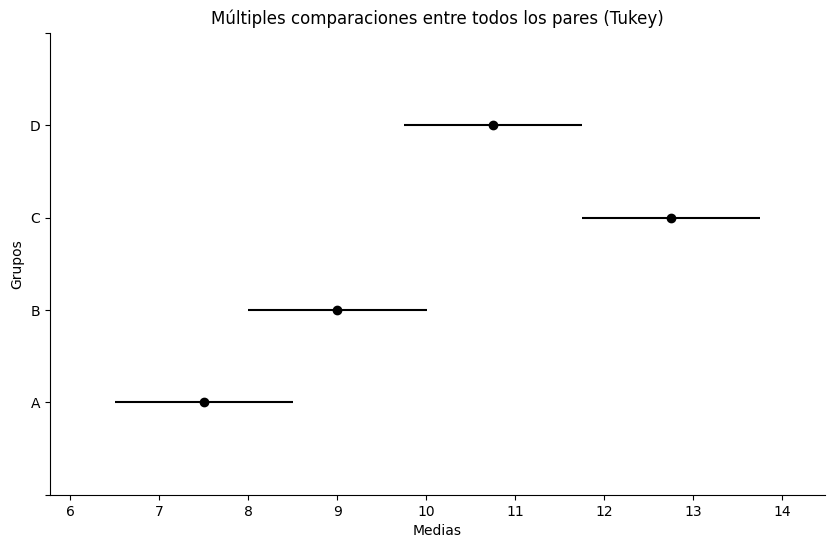

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.50

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

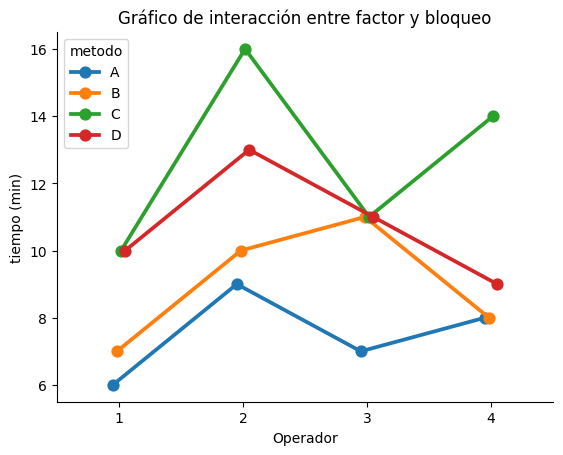

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x="operador", y="valor", hue="metodo", data=df, dodge=True)
plt.title(f"Gráfico de interacción entre factor y bloqueo")
plt.xlabel("Operador")
plt.ylabel("tiempo (min)")
plt.legend(title="metodo")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



In [39]:
df.groupby(["metodo"])["valor"].mean()

,valor
metodo,
A,7.50
B,9.00
C,12.75
D,10.75


In [40]:
modelo_lineal.params

,0
Intercept,5.75
C(metodo)[T.B],1.50
C(metodo)[T.C],5.25
C(metodo)[T.D],3.25
C(operador)[T.2],3.75
C(operador)[T.3],1.75
C(operador)[T.4],1.50


# Diseño en cuadro latino

**Comparación de cuatro marcas de llantas.** Una compañía de mensajería está interesada en determinar cuál marca de llantas tiene mayor duración en términos del desgaste. Para ello se planea un experimento en cuadro latino, en el que se comparan las cuatro marcas de llantas sometiéndolas a una prueba de 32 000 kilómetros de recorrido, utilizando cuatro diferentes tipos de auto y las cuatro posiciones posibles de las llantas en el auto. Así, el factor de interés es el **tipo de llanta o marca**, y se controlan dos factores de bloques: el **tipo de carro** y la **posición de la llanta en el carro**. Estos factores de bloques se controlan ya que, por experiencia, se sabe que el tipo de carro y la posición de la llanta tienen efecto en el desgaste de la misma.

La elección del cuadro latino a utilizar se hace antes de obtener los datos. Para ello, a partir de un cuadro latino inicial se aleatorizan las columnas y los renglones.


| Posición | Carro 1   | Carro 2   | Carro 3   | Carro 4   |
|----------|-----------|-----------|-----------|-----------|
| 1        | C = 12    | D = 11    | A = 13    | B = 8     |
| 2        | B = 14    | C = 12    | D = 11    | A = 3     |
| 3        | A = 17    | B = 14    | C = 10    | D = 9     |
| 4        | D = 13    | A = 14    | B = 13    | C = 9     |

- Bloque 1: posición 1, posición 2, posición 3 y posición 4.
- Bloque 2: carro 1, carro 2, carro 3, carro 4.
- Variable de interés: marca A, marca B, marca C, marca D.
- Variable de comparación (respuesta): desgaste en mm.


In [41]:
import pandas as pd
from io import StringIO

data = '''
posicion,carro,marca,desgaste
1,1,C,12
1,2,D,11
1,3,A,13
1,4,B,8
2,1,B,14
2,2,C,12
2,3,D,11
2,4,A,3
3,1,A,17
3,2,B,14
3,3,C,10
3,4,D,9
4,1,D,13
4,2,A,14
4,3,B,13
4,4,C,9
'''

df = pd.read_csv(StringIO(data))
df

,posicion,carro,marca,desgaste
0,1,1,C,12
1,1,2,D,11
2,1,3,A,13
3,1,4,B,8
4,2,1,B,14
5,2,2,C,12
6,2,3,D,11
7,2,4,A,3
8,3,1,A,17
9,3,2,B,14


In [42]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo_lineal = ols(f'desgaste ~ C(marca) + C(posicion) + C(carro)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=3)
tabla_anova

,sum_sq,df,F,PR(>F)
Intercept,308.0250,1.0,60.844444,0.000234
C(marca),5.6875,3.0,0.374486,0.774922
C(posicion),16.1875,3.0,1.065844,0.430879
C(carro),103.6875,3.0,6.827160,0.023173
Residual,30.3750,6.0,NaN,NaN


valor-p (Shapiro) = 0.18841416745087913


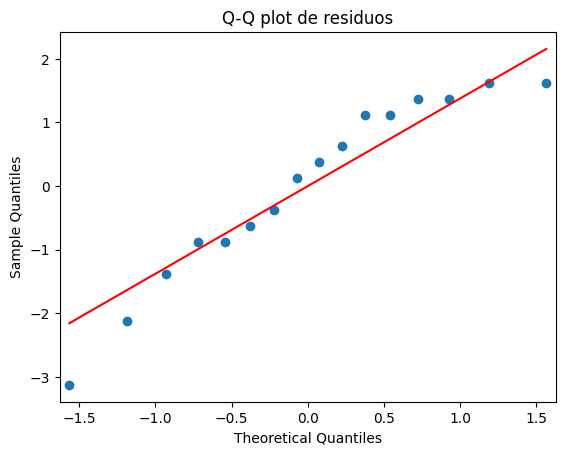

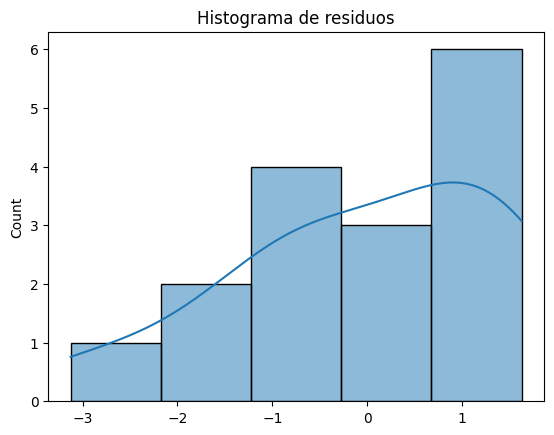

In [43]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

# Diseño en cuadrado Grecolatino

Tomando el ejemplo visto en DBCA, donde se comparan cuatro métodos de ensamble y se tiene el factor de bloque operador, se podrían tener dos factores de bloque adicionales: orden en el se hace el ensamble y lugar donde se hace. De acuerdo con esto, el diseño en cuadro grecolatino se observa en la tabla

| Orden del ensamble | Operador 1  | Operador 2  | Operador 3  | Operador 4  |
|--------------------|-------------|-------------|-------------|-------------|
| 1                  | Cβ = 10     | Bγ = 10     | Dδ = 12     | Aα = 7      |
| 2                  | Bα = 8      | Cδ = 15     | Aγ = 7      | Dβ = 14     |
| 3                  | Aδ = 6      | Dα = 14     | Bβ = 11     | Cγ = 13     |
| 4                  | Dγ = 11     | Aβ = 8      | Cα = 10     | Bδ = 8      |

- Bloque 1: operador 1, operador 2, operador 3 y operador 4.
- Bloque 2: orden de ensamble 1, orden de ensamble 2, orden de ensamble 3, orden de ensamble 4.
- Bloque 3: lugar de ensamble $\alpha$, lugar de ensamble $\beta$, lugar de ensamble $\gamma$ y lugar de ensamble $\delta$.
- Variable de interés: método A, método B, método C, método D.
- Variable de comparación (respuesta): tiempo en minutos.

In [44]:
import pandas as pd
from io import StringIO

data = '''orden,operador,metodo,lugar,valor
1,1,C,b,10
1,2,B,c,10
1,3,D,d,12
1,4,A,a,7
2,1,B,a,8
2,2,C,d,15
2,3,A,c,7
2,4,D,b,14
3,1,A,d,6
3,2,D,a,14
3,3,B,b,11
3,4,C,c,13
4,1,D,c,11
4,2,A,b,8
4,3,C,a,10
4,4,B,d,8
'''

df = pd.read_csv(StringIO(data))
df

,orden,operador,metodo,lugar,valor
0,1,1,C,b,10
1,1,2,B,c,10
2,1,3,D,d,12
3,1,4,A,a,7
4,2,1,B,a,8
5,2,2,C,d,15
6,2,3,A,c,7
7,2,4,D,b,14
8,3,1,A,d,6
9,3,2,D,a,14


In [45]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'valor ~ C(metodo) + C(operador) + C(orden) + C(lugar)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(metodo),83.5,3.0,23.857143,0.013532
C(operador),18.5,3.0,5.285714,0.102428
C(orden),9.5,3.0,2.714286,0.216969
C(lugar),2.0,3.0,0.571429,0.671447
Residual,3.5,3.0,NaN,NaN


In [46]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'valor ~ C(metodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(metodo),83.5,3.0,9.970149,0.001403
Residual,33.5,12.0,NaN,NaN
